In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [306]:
votecount = pd.read_csv('data_absentee_voting/total_results_CONDENSED.csv')
votecount.head()

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04T10:43:52Z,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04T10:44:01Z,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04T10:44:01Z,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04T10:44:02Z,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04T10:44:03Z,47.90957,R+48,Trump +48,republican,47.90957,2


In [307]:
#Cleaning data
votecount['last_updated'] = votecount['last_updated'].str.replace('Z', ' ')
votecount['last_updated'] = votecount['last_updated'].str.replace('T', ' ')
votecount.head()

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04 10:43:52,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04 10:44:01,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04 10:44:01,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04 10:44:02,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:03,47.90957,R+48,Trump +48,republican,47.90957,2


In [308]:
#Converting last_updated to a datetime object so we can plot it correctly
votecount['last_updated'] = pd.to_datetime(votecount['last_updated'], format = '%Y-%m-%d %H:%M:%S')
votecount.head()


,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04 10:43:52,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04 10:44:01,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04 10:44:01,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04 10:44:02,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:03,47.90957,R+48,Trump +48,republican,47.90957,2


In [309]:
votecount.head(40)

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04 10:43:52,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04 10:44:01,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04 10:44:01,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04 10:44:02,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:03,47.90957,R+48,Trump +48,republican,47.90957,2
5,AK,AK-G-P-2020-11-03,2914,ED 14,4050,0,2,7,34,11983,34%,34% reported,edison,2,unknown,None,4000,None,None,2984,882,143,18.0,5.0,16.0,2.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:04,51.90123,R+52,Trump +52,republican,51.90123,2
6,AK,AK-G-P-2020-11-03,2915,ED 15,2189,477,2,5,38,5729,38%,38% reported,edison,2,unknown,None,4000,None,None,1207,879,74,16.0,8.0,2.0,3.0,0.0,220,248,9,0.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:05,14.98401,R+15,Trump +15,republican,14.98401,2
7,AK,AK-G-P-2020-11-03,2916,ED 16,3057,223,3,7,36,8551,36%,36% reported,edison,2,unknown,None,4000,None,None,1721,1196,96,25.0,7.0,9.0,3.0,0.0,51,166,5,0.0,0.0,1.0,0.0,0.0,2020-11-04 10:44:06,17.1737,R+17,Trump +17,republican,17.1737,2
8,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.2,Trump +0.2,republican,0.20024,2
9,AK,AK-G-P-2020-11-03,2918,ED 18,2966,1225,3,10,35,8512,35%,35% reported,edison,2,unknown,None,4000,None,None,1293,1576,46,33.0,6.0,10.0,2.0,0.0,416,785,10,9.0,1.0,3.0,1.0,0.0,2020-11-04 10:43:23,9.54147,D+10,Biden +10,democrat,-9.54147,2


In [310]:
votecount.dtypes

state                                     object
race_id                                   object
fips                                       int64
name                                      object
votes                                      int64
absentee_votes                             int64
reporting                                  int64
precincts                                  int64
eevp                                      object
tot_exp_vote                              object
eevp_value                                object
eevp_display                              object
eevp_source                               object
turnout_stage                             object
absentee_count_progress                   object
absentee_outstanding                      object
absentee_max_ballots                      object
provisional_outstanding                   object
provisional_count_progress                object
results-trumpd                             int64
results-bidenj      

In [311]:
#Testing this plotting style with arkansas data
ak = votecount[votecount.state=='AK']

In [312]:
ak = ak.sort_values(by=['last_updated'],ascending =1)
ak = ak.reset_index()
ak.head(40)

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,6989,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.20,Trump +0.20,republican,0.20024,1520
1,8,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.2,Trump +0.2,republican,0.20024,2
2,9,AK,AK-G-P-2020-11-03,2918,ED 18,2966,1225,3,10,35,8512,35%,35% reported,edison,2,unknown,None,4000,None,None,1293,1576,46,33.0,6.0,10.0,2.0,0.0,416,785,10,9.0,1.0,3.0,1.0,0.0,2020-11-04 10:43:23,9.54147,D+10,Biden +10,democrat,-9.54147,2
3,10,AK,AK-G-P-2020-11-03,2919,ED 19,2683,533,3,6,49,5511,49%,49% reported,edison,2,unknown,None,4000,None,None,1236,1332,61,25.0,2.0,16.0,11.0,0.0,151,369,7,2.0,0.0,2.0,2.0,0.0,2020-11-04 10:43:23,3.57808,D+4,Biden +4,democrat,-3.57808,2
4,12,AK,AK-G-P-2020-11-03,2920,ED 20,3050,1053,3,9,37,8211,37%,37% reported,edison,2,unknown,None,4000,None,None,1242,1697,78,20.0,8.0,5.0,0.0,0.0,308,726,14,4.0,0.0,1.0,0.0,0.0,2020-11-04 10:43:23,14.91803,D+15,Biden +15,democrat,-14.91803,2
5,13,AK,AK-G-P-2020-11-03,2921,ED 21,3364,482,3,8,34,9944,34%,34% reported,edison,2,unknown,None,4000,None,None,1657,1565,94,23.0,11.0,14.0,0.0,0.0,107,370,4,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:43:25,2.73484,R+3,Trump +3,republican,2.73484,2
6,14,AK,AK-G-P-2020-11-03,2922,ED 22,5001,1061,4,7,52,9628,52%,52% reported,edison,2,unknown,None,4000,None,None,3079,1776,113,18.0,8.0,5.0,2.0,0.0,493,542,17,4.0,4.0,0.0,1.0,0.0,2020-11-04 10:43:27,26.05479,R+26,Trump +26,republican,26.05479,2
7,17,AK,AK-G-P-2020-11-03,2925,ED 25,4866,1160,4,7,52,9346,52%,52% reported,edison,2,unknown,None,4000,None,None,2889,1812,108,38.0,8.0,8.0,3.0,0.0,487,650,18,4.0,0.0,0.0,1.0,0.0,2020-11-04 10:43:28,22.13317,R+22,Trump +22,republican,22.13317,2
8,16,AK,AK-G-P-2020-11-03,2924,ED 24,5442,1344,4,7,51,10684,51%,51% reported,edison,2,unknown,None,4000,None,None,3454,1831,118,20.0,10.0,6.0,3.0,0.0,627,693,20,2.0,1.0,1.0,0.0,0.0,2020-11-04 10:43:28,29.82359,R+30,Trump +30,republican,29.82359,2
9,15,AK,AK-G-P-2020-11-03,2923,ED 23,4202,925,4,8,53,7963,53%,53% reported,edison,2,unknown,None,4000,None,None,2388,1661,98,23.0,10.0,13.0,9.0,0.0,401,506,12,2.0,0.0,2.0,2.0,0.0,2020-11-04 10:43:28,17.30129,R+17,Trump +17,republican,17.30129,2


In [313]:
#Creating a cumulative votes column
ak['cumul_votes'] = ak['votes'][1]
for i in range(1,len(ak)):
    ak['cumul_votes'][i] = ak['cumul_votes'][i-1]+ak['votes'][i]
    
ak.head()

<ipython-input-313-dd6b220e3fa3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ak['cumul_votes'][i] = ak['cumul_votes'][i-1]+ak['votes'][i]


,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes
0,6989,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.20,Trump +0.20,republican,0.20024,1520,2497
1,8,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.2,Trump +0.2,republican,0.20024,2,4994
2,9,AK,AK-G-P-2020-11-03,2918,ED 18,2966,1225,3,10,35,8512,35%,35% reported,edison,2,unknown,None,4000,None,None,1293,1576,46,33.0,6.0,10.0,2.0,0.0,416,785,10,9.0,1.0,3.0,1.0,0.0,2020-11-04 10:43:23,9.54147,D+10,Biden +10,democrat,-9.54147,2,7960
3,10,AK,AK-G-P-2020-11-03,2919,ED 19,2683,533,3,6,49,5511,49%,49% reported,edison,2,unknown,None,4000,None,None,1236,1332,61,25.0,2.0,16.0,11.0,0.0,151,369,7,2.0,0.0,2.0,2.0,0.0,2020-11-04 10:43:23,3.57808,D+4,Biden +4,democrat,-3.57808,2,10643
4,12,AK,AK-G-P-2020-11-03,2920,ED 20,3050,1053,3,9,37,8211,37%,37% reported,edison,2,unknown,None,4000,None,None,1242,1697,78,20.0,8.0,5.0,0.0,0.0,308,726,14,4.0,0.0,1.0,0.0,0.0,2020-11-04 10:43:23,14.91803,D+15,Biden +15,democrat,-14.91803,2,13693


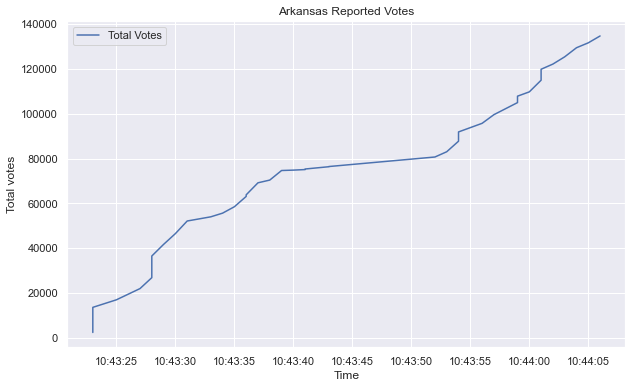

In [314]:
#Plotting cumulative reported votes over reporting time
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(ak.last_updated, ak.cumul_votes, label = 'Total Votes')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Total votes')
ax.set_title('Arkansas Reported Votes')
ax.grid(True)
ax.legend(loc='upper left');

In [315]:
#Try it again with NY
ny = votecount[votecount.state=='NY']
ny.head()

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
1998,NY,NY-G-P-2020-11-03,36001,Albany,121529,0,246,317,78,156602,78%,78% reported,edison,4,unknown,None,None,None,None,45570,73189,1258,NaN,478.0,NaN,NaN,460.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:31,22.72626,D+23,Biden +23,democrat,-22.72626,2
1999,NY,NY-G-P-2020-11-03,36003,Allegany,17271,0,28,34,82,20935,82%,82% reported,edison,2,unknown,None,None,None,None,12670,4188,278,NaN,69.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:32,49.11123,R+49,Trump +49,republican,49.11123,2
2000,NY,NY-G-P-2020-11-03,36005,Bronx,329638,0,706,959,74,447465,74%,74% reported,edison,2,unknown,None,None,None,None,55849,271835,607,NaN,327.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:33,65.52218,D+66,Biden +66,democrat,-65.52218,2
2001,NY,NY-G-P-2020-11-03,36047,Brooklyn,693937,0,1331,1730,77,902278,77%,77% reported,edison,2,unknown,None,None,None,None,174731,514133,1852,NaN,517.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:44,48.90963,D+49,Biden +49,democrat,-48.90963,2
2002,NY,NY-G-P-2020-11-03,36007,Broome,72251,0,106,141,75,96401,75%,75% reported,edison,4,unknown,None,None,None,None,38296,32209,900,NaN,293.0,NaN,NaN,237.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:34,8.4248,R+8,Trump +8,republican,8.4248,2


In [316]:
#Sorting by time of last update
ny = ny.sort_values(by=['last_updated'],ascending =1)
ny = ny.reset_index()
ny.head()

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,2057,NY,NY-G-P-2020-11-03,36119,Westchester,625318,0,942,942,99,630000,>98%,>98% reported,edison,2,none,None,None,None,None,217725,400881,3518,NaN,1637.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,29.29006,D+29,Biden +29,democrat,-29.29006,2
1,2058,NY,NY-G-P-2020-11-03,36121,Wyoming,17162,0,35,40,89,19374,89%,89% reported,edison,2,unknown,None,None,None,None,12969,3840,228,NaN,74.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,53.1931,R+53,Trump +53,republican,53.1931,2
2,2059,NY,NY-G-P-2020-11-03,36123,Yates,8817,0,14,18,78,11274,78%,78% reported,edison,2,unknown,None,None,None,None,5552,3046,143,NaN,44.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:29,28.42237,R+28,Trump +28,republican,28.42237,2
3,1998,NY,NY-G-P-2020-11-03,36001,Albany,121529,0,246,317,78,156602,78%,78% reported,edison,4,unknown,None,None,None,None,45570,73189,1258,NaN,478.0,NaN,NaN,460.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:31,22.72626,D+23,Biden +23,democrat,-22.72626,2
4,1999,NY,NY-G-P-2020-11-03,36003,Allegany,17271,0,28,34,82,20935,82%,82% reported,edison,2,unknown,None,None,None,None,12670,4188,278,NaN,69.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:32,49.11123,R+49,Trump +49,republican,49.11123,2


In [317]:
# Creating a cumulative total of votes column
ny['cumul_votes'] = ny['votes'][1]
ny['cumul_absentee'] = ny['absentee_votes'][1]
for i in range(1,len(ny)):
    ny['cumul_votes'][i] = ny['cumul_votes'][i-1]+ny['votes'][i]
    ny['cumul_absentee'][i] = ny['cumul_absentee'][i-1]+ny['absentee_votes'][i]
    
ny.head()

<ipython-input-317-0afae7c0fdb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['cumul_votes'][i] = ny['cumul_votes'][i-1]+ny['votes'][i]
<ipython-input-317-0afae7c0fdb4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['cumul_absentee'][i] = ny['cumul_absentee'][i-1]+ny['absentee_votes'][i]


,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes,cumul_absentee
0,2057,NY,NY-G-P-2020-11-03,36119,Westchester,625318,0,942,942,99,630000,>98%,>98% reported,edison,2,none,None,None,None,None,217725,400881,3518,NaN,1637.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,29.29006,D+29,Biden +29,democrat,-29.29006,2,17162,0
1,2058,NY,NY-G-P-2020-11-03,36121,Wyoming,17162,0,35,40,89,19374,89%,89% reported,edison,2,unknown,None,None,None,None,12969,3840,228,NaN,74.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,53.1931,R+53,Trump +53,republican,53.1931,2,34324,0
2,2059,NY,NY-G-P-2020-11-03,36123,Yates,8817,0,14,18,78,11274,78%,78% reported,edison,2,unknown,None,None,None,None,5552,3046,143,NaN,44.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:29,28.42237,R+28,Trump +28,republican,28.42237,2,43141,0
3,1998,NY,NY-G-P-2020-11-03,36001,Albany,121529,0,246,317,78,156602,78%,78% reported,edison,4,unknown,None,None,None,None,45570,73189,1258,NaN,478.0,NaN,NaN,460.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:31,22.72626,D+23,Biden +23,democrat,-22.72626,2,164670,0
4,1999,NY,NY-G-P-2020-11-03,36003,Allegany,17271,0,28,34,82,20935,82%,82% reported,edison,2,unknown,None,None,None,None,12670,4188,278,NaN,69.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:32,49.11123,R+49,Trump +49,republican,49.11123,2,181941,0


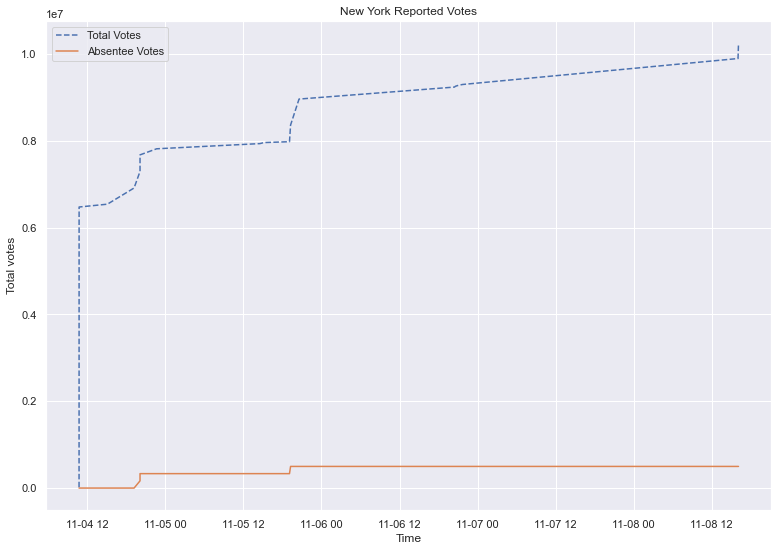

In [318]:
fig, ax = plt.subplots(figsize=(13, 9))

# Specify how our lines should look
ax.plot(ny.last_updated, ny.cumul_votes, label = 'Total Votes',linestyle='--')
ax.plot(ny.last_updated, ny.cumul_absentee, label = 'Absentee Votes')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Total votes')
ax.set_title('New York Reported Votes')
ax.grid(True)
ax.legend(loc='upper left');

In [319]:
#Now PA
pa = votecount[votecount.state=='PA']
pa.head()


,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
2261,PA,PA-G-P-2020-11-03,42001,Adams,37193,0,34,50,68,55087,68%,68% reported,edison,4,none,None,3456,None,None,29944,6611,544,NaN,NaN,NaN,NaN,94.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:49,62.73492,R+63,Trump +63,republican,62.73492,2
2262,PA,PA-G-P-2020-11-03,42003,Allegheny,529244,171838,928,1323,70,754132,70%,70% reported,edison,4,unknown,None,44826,None,None,237435,283368,6441,NaN,NaN,NaN,NaN,2000.0,31950,138425,1463,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:51,8.67898,D+9,Biden +9,democrat,-8.67898,2
2263,PA,PA-G-P-2020-11-03,42005,Armstrong,28848,0,49,62,81,35454,81%,81% reported,edison,2,unknown,None,2059,None,None,24233,4275,340,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:51,69.18331,R+69,Trump +69,republican,69.18331,2
2264,PA,PA-G-P-2020-11-03,42007,Beaver,63792,0,85,129,66,96942,66%,66% reported,edison,2,unknown,None,6320,None,None,45464,17304,851,NaN,NaN,NaN,NaN,173.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:51,44.14347,R+44,Trump +44,republican,44.14347,2
2265,PA,PA-G-P-2020-11-03,42009,Bedford,27018,5369,39,40,100,26973,>98%,>98% reported,edison,6,unknown,None,2106,None,None,22529,4266,178,NaN,NaN,NaN,NaN,45.0,2872,2424,55,NaN,NaN,NaN,NaN,18.0,2020-11-04 10:43:52,67.59568,R+68,Trump +68,republican,67.59568,2


In [320]:
#Sorting by time of last update
pa = pa.sort_values(by=['last_updated'],ascending =1)
pa = pa.reset_index()
pa.head()

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,2288,PA,PA-G-P-2020-11-03,42055,Franklin,59351,0,54,73,73,80888,73%,73% reported,edison,4,none,None,4866,None,None,48912,9483,813,NaN,NaN,NaN,NaN,143.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,66.43359,R+66,Trump +66,republican,66.43359,2
1,2291,PA,PA-G-P-2020-11-03,42061,Huntingdon,22657,0,57,58,100,22097,>98%,>98% reported,edison,2,none,None,1354,None,None,16937,5389,280,NaN,NaN,NaN,NaN,51.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,50.9688,R+51,Trump +51,republican,50.9688,2
2,2290,PA,PA-G-P-2020-11-03,42059,Greene,13055,0,30,42,74,17676,74%,74% reported,edison,2,unknown,None,1218,None,None,10708,2210,137,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,65.09383,R+65,Trump +65,republican,65.09383,2
3,2289,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7592,>98%,>98% reported,edison,2,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,2
4,6915,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7668,>98%,>98% reported,edison,4,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,1466


In [321]:
# Creating a cumulative total of votes column, absentee and in person
pa['cumul_votes'] = pa['votes'][1]
pa['cumul_absentee'] = pa['absentee_votes'][1]
pa['cumul_inperson'] = pa['votes'][1] - pa['absentee_votes'][1]
for i in range(1,len(pa)):
    pa['cumul_votes'][i] = pa['cumul_votes'][i-1]+pa['votes'][i]
    pa['cumul_absentee'][i] = pa['cumul_absentee'][i-1]+pa['absentee_votes'][i]
    pa['cumul_inperson'][i] = (pa['cumul_votes'][i-1]+pa['votes'][i])-(pa['cumul_absentee'][i-1]+pa['absentee_votes'][i])
    
    
pa.head()

<ipython-input-321-d60a99627334>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['cumul_votes'][i] = pa['cumul_votes'][i-1]+pa['votes'][i]
<ipython-input-321-d60a99627334>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['cumul_absentee'][i] = pa['cumul_absentee'][i-1]+pa['absentee_votes'][i]
<ipython-input-321-d60a99627334>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['cumul_inperson'][i] = (pa['cumul_votes'][i-1]+pa['vo

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes,cumul_absentee,cumul_inperson
0,2288,PA,PA-G-P-2020-11-03,42055,Franklin,59351,0,54,73,73,80888,73%,73% reported,edison,4,none,None,4866,None,None,48912,9483,813,NaN,NaN,NaN,NaN,143.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,66.43359,R+66,Trump +66,republican,66.43359,2,22657,0,22657
1,2291,PA,PA-G-P-2020-11-03,42061,Huntingdon,22657,0,57,58,100,22097,>98%,>98% reported,edison,2,none,None,1354,None,None,16937,5389,280,NaN,NaN,NaN,NaN,51.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,50.9688,R+51,Trump +51,republican,50.9688,2,45314,0,45314
2,2290,PA,PA-G-P-2020-11-03,42059,Greene,13055,0,30,42,74,17676,74%,74% reported,edison,2,unknown,None,1218,None,None,10708,2210,137,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,65.09383,R+65,Trump +65,republican,65.09383,2,58369,0,58369
3,2289,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7592,>98%,>98% reported,edison,2,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,2,66176,0,66176
4,6915,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7668,>98%,>98% reported,edison,4,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,1466,73983,0,73983


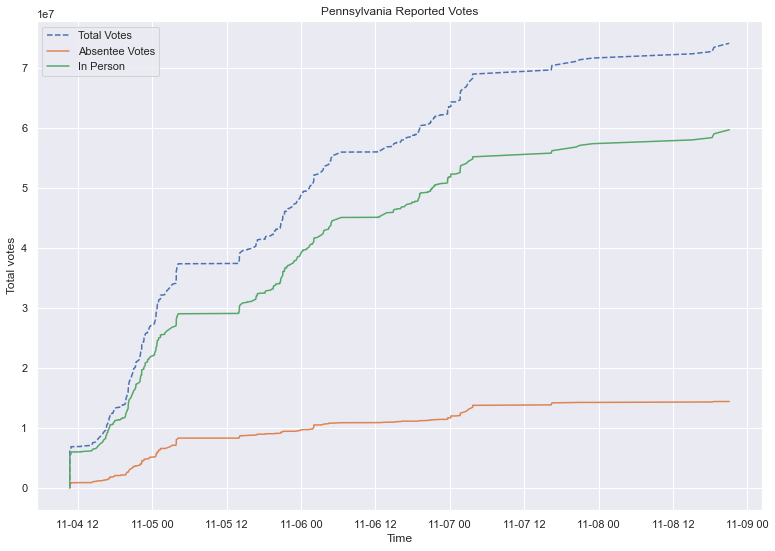

In [322]:
fig, ax = plt.subplots(figsize=(13, 9))

# Specify how our lines should look
ax.plot(pa.last_updated, pa.cumul_votes, label = 'Total Votes',linestyle='--')
ax.plot(pa.last_updated, pa.cumul_absentee, label = 'Absentee Votes')
ax.plot(pa.last_updated, pa.cumul_inperson, label = 'In Person')
#ax.plot(ny.last_updated, ny['results-trumpd'], label = 'Absentee Votes')
#ax.plot(ny.last_updated, ny['results-bidenj'], label = 'Absentee Votes')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Total votes')
ax.set_title('Pennsylvania Reported Votes')
ax.grid(True)
ax.legend(loc='upper left');

In [323]:
turnout = pd.read_csv('data_absentee_voting/1980-2014 November General Election - Turnout Rates.csv', header = 1)
turnout.head()

,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,0,0,United States,36.7%,36.0%,33.2%,"83,262,122","81,687,059","227,157,964","245,712,915",8.4%,"1,493,706","2,298,993","548,576","3,329,718","5,345,814"
1,2014,41,1,Alabama,33.2%,32.9%,31.5%,"1,191,274","1,180,413","3,588,783","3,751,844",2.5%,"31,691","53,640","8,097","69,826",NaN
2,2014,81,2,Alaska,54.8%,54.2%,51.0%,"285,431","282,382","520,562","553,473",3.9%,"5,216","7,077","2,210","11,389",NaN
3,2014,61,3,Arizona,34.1%,33.4%,29.5%,"1,537,671","1,506,416","4,510,186","5,110,890",10.1%,"37,516","73,232","7,502","86,028",NaN
4,2014,42,4,Arkansas,40.3%,40.1%,37.5%,"852,642","848,592","2,117,881","2,263,040",4.0%,"17,756","28,192","21,743","55,287",NaN


In [324]:
turnout.tail()

,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
931,1980,40,47,Virginia,NaN,48.7%,47.5%,NaN,"1,866,032","3,830,887","3,927,383",2.0%,"8,920","11,463","4,783","19,435",NaN
932,1980,73,48,Washington,60.6%,59.6%,57.4%,"1,772,904","1,742,394","2,923,670","3,037,193",2.9%,"4,399","12,527","14,669","25,332",NaN
933,1980,56,49,West Virginia,53.5%,53.2%,52.8%,"742,150","737,715","1,387,231","1,396,595",0.5%,"1,257","2,650",475,"3,057",NaN
934,1980,25,50,Wisconsin,NaN,68.4%,67.4%,NaN,"2,273,221","3,322,053","3,371,087",1.0%,"3,980","19,088","2,639","16,163",NaN
935,1980,68,51,Wyoming,55.4%,54.1%,53.4%,"181,004","176,713","326,644","330,784",0.9%,534,940,154,"1,158",NaN


In [325]:
turnout2020 = pd.read_csv('data_absentee_voting/2020 November General Election - Turnout Rates.csv', header = 1)
turnout2020.head()

,Unnamed: 0,Source,Unnamed: 2,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"159,408,397",NaN,66.6%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www.sos.alabama.gov/sites/default/file...,OFFICIAL,"2,325,000","2,323,282",63.1%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,OFFICIAL,"361,400","359,530",68.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,OFFICIAL,"3,420,565","3,385,294",65.9%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,OFFICIAL,"1,223,675","1,219,069",56.1%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [326]:
us = turnout[turnout['Unnamed: 3'] == 'United States']
us = us.reset_index()
us = us.drop(['index'],axis = 1)
us

,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,0,0,United States,36.7%,36.0%,33.2%,"83,262,122","81,687,059","227,157,964","245,712,915",8.4%,"1,493,706","2,298,993","548,576","3,329,718","5,345,814"
1,2012,0,0,United States,58.6%,58.0%,53.6%,"130,292,355","129,070,906","222,474,111","240,957,993",8.4%,"1,473,412","2,342,582","637,410","3,352,390","5,127,418"
2,2010,0,0,United States,41.8%,41.0%,37.8%,"90,912,015","89,099,476","217,551,109","236,022,989",8.5%,"1,512,225","1,321,051","629,644","3,244,035","4,972,217"
3,2008,0,0,United States,62.2%,61.6%,56.9%,"132,609,063","131,304,731","213,313,508","230,872,030",8.4%,"1,605,448","2,451,085","627,680","3,144,831","4,972,217"
4,2006,0,0,United States,41.3%,40.4%,37.2%,"85,769,132","83,815,592","207,643,594","225,485,399",8.6%,"1,566,526","2,418,574","587,305","3,363,118","4,417,527"
5,2004,0,0,United States,60.7%,60.1%,55.4%,"123,535,883","122,294,978","203,483,455","220,336,019",8.2%,"1,490,169","2,387,283","474,632","3,158,443","3,862,836"
6,2002,0,0,United States,40.5%,39.5%,36.3%,"80,295,249","78,381,943","198,381,939","215,461,549",8.0%,"1,456,927","2,451,708","485,282","3,168,063","3,308,145"
7,2000,0,0,United States,55.3%,54.2%,50.0%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000"
8,1998,0,0,United States,39.3%,38.1%,35.3%,"74,825,832","72,537,000","190,419,570","205,313,182",7.3%,"1,285,469","2,236,975","515,924","2,919,881","2,937,000"
9,1996,0,0,United States,NaN,51.7%,48.1%,NaN,"96,262,935","186,347,044","200,015,917",6.8%,"1,162,253","1,865,990","491,165","2,586,413","2,499,256"


In [327]:

tot = us[['Year','Total Ballots Counted']]
tot2 = tot[0:9]

for x in tot2:
    print(x)
    
temp = tot2['Total Ballots Counted']
temp2 = [x.replace(',', '') for x in temp]
tot2['Total Ballots Counted'] = temp2
tot2

Year
Total Ballots Counted


<ipython-input-327-8719d0e6150f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot2['Total Ballots Counted'] = temp2


,Year,Total Ballots Counted
0,2014,83262122
1,2012,130292355
2,2010,90912015
3,2008,132609063
4,2006,85769132
5,2004,123535883
6,2002,80295249
7,2000,107390107
8,1998,74825832


In [328]:
temp3 = tot2[tot2['Year'].isin([2012,2008,2004,2000])]
temp3.head()

,Year,Total Ballots Counted
1,2012,130292355
3,2008,132609063
5,2004,123535883
7,2000,107390107


In [329]:
temp3 = temp3.iloc[::-1]
temp3['Total Ballots Counted'] = pd.to_numeric(temp3['Total Ballots Counted'])
temp3.head()

,Year,Total Ballots Counted
7,2000,107390107
5,2004,123535883
3,2008,132609063
1,2012,130292355


In [330]:
temp3 = temp3.append({'Year':2016, 'Total Ballots Counted':138846571},ignore_index=True)
temp3 = temp3.append({'Year':2020, 'Total Ballots Counted':159408397},ignore_index=True)


Text(0.5, 1.0, 'Total ballots counted in the US over the years 2000-2020')

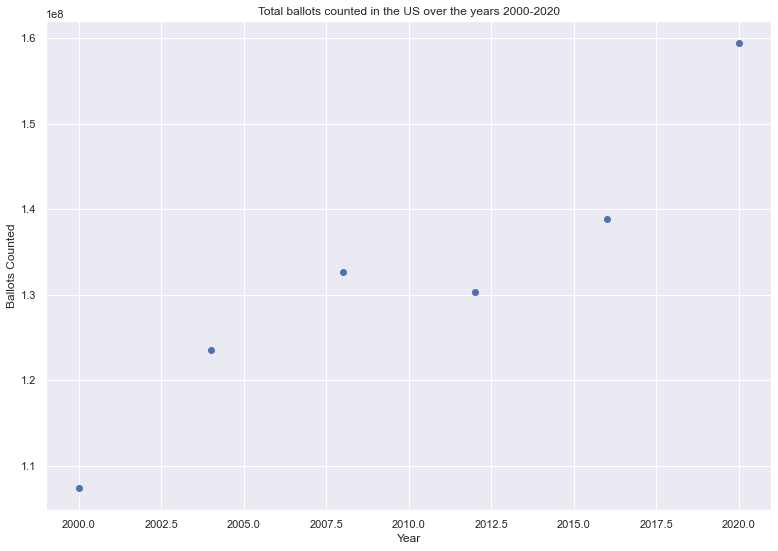

In [337]:

fig, ax = plt.subplots(figsize=(13, 9))
ax.scatter(temp3.Year, temp3['Total Ballots Counted'])
ax.set_xlabel("Year")
ax.set_ylabel("Ballots Counted")
ax.set_title("Total ballots counted in the US over the years 2000-2020")

In [338]:
# do this again for our 12 states, big scatter plot
turnout.head()
df2 = turnout[turnout.Year.isin([2012,2008,2004,2000])]
df2.head()

,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
52,2012,0,0,United States,58.6%,58.0%,53.6%,"130,292,355","129,070,906","222,474,111","240,957,993",8.4%,"1,473,412","2,342,582","637,410","3,352,390","5,127,418"
53,2012,41,1,Alabama,NaN,58.6%,56.0%,NaN,"2,074,338","3,539,217","3,707,440",2.6%,"32,232","57,993","8,616","71,584",NaN
54,2012,81,2,Alaska,58.9%,58.7%,55.3%,"301,694","300,495","511,792","543,763",3.8%,"5,633","7,173","1,882","11,317",NaN
55,2012,61,3,Arizona,53.0%,52.6%,46.5%,"2,323,579","2,306,559","4,387,900","4,959,270",9.9%,"35,188","72,452","7,460","81,048",NaN
56,2012,42,4,Arkansas,51.1%,50.7%,47.7%,"1,078,548","1,069,468","2,109,847","2,242,740",3.5%,"14,471","30,122","23,372","53,808",NaN


In [339]:
df2 = df2[df2['Unnamed: 3'].isin(['United States', 'Arizona','Florida','Georgia','Ohio','North Carolina', 'Nevada','Minnesota','Michigan','Iowa','Wisconsin','Pennsylvania','Texas'])]
df2.head()


,Year,ICPSR State Code,Alphanumeric State Code,Unnamed: 3,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
52,2012,0,0,United States,58.6%,58.0%,53.6%,"130,292,355","129,070,906","222,474,111","240,957,993",8.4%,"1,473,412","2,342,582","637,410","3,352,390","5,127,418"
55,2012,61,3,Arizona,53.0%,52.6%,46.5%,"2,323,579","2,306,559","4,387,900","4,959,270",9.9%,"35,188","72,452","7,460","81,048",NaN
62,2012,43,10,Florida,63.3%,62.8%,55.1%,"8,538,264","8,474,179","13,495,057","15,380,947",10.8%,"91,954","240,869","4,538","224,153",NaN
63,2012,44,11,Georgia,59.3%,59.0%,52.3%,"3,919,355","3,900,050","6,606,607","7,452,696",7.2%,"52,737","442,061","24,761","311,790",NaN
68,2012,31,16,Iowa,70.6%,70.3%,67.1%,"1,589,951","1,582,180","2,251,748","2,356,209",3.2%,"8,470","29,333","5,151","29,167",NaN


In [340]:
turnoutprevious = df2[['Unnamed: 3','Total Ballots Counted','Year']]
turnoutprevious.columns = ['State','Votes_Cast','Year']
turnoutprevious.head()

,State,Votes_Cast,Year
52,United States,"130,292,355",2012
55,Arizona,"2,323,579",2012
62,Florida,"8,538,264",2012
63,Georgia,"3,919,355",2012
68,Iowa,"1,589,951",2012


In [341]:
turnout2016 = pd.read_csv('data_absentee_voting/2016 November General Election - Turnout Rates.csv',header=1)
turnout2016.head()

,Unnamed: 0,State Results Website,Status,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted (Estimate),Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,60.1%,59.2%,54.7%,"138,846,571","136,753,936","230,931,921","250,055,734",8.3%,"1,416,810","2,198,907","506,297","3,176,484","4,739,596",NaN
1,Alabama,http://www.alabamavotes.gov/downloads/election...,Official,59.1%,58.8%,56.3%,"2,134,061","2,123,372","3,609,447","3,770,142",2.5%,"28,680","52,177","8,562","66,983",NaN,AL
2,Alaska,http://www.elections.alaska.gov/results/16GENR/,Official,61.5%,61.0%,57.4%,"321,271","318,608","522,679","555,367",4.1%,"4,317","6,621","1,812","9,903",NaN,AK
3,Arizona,http://apps.azsos.gov/election/2016/General/Of...,Official,56.1%,54.9%,48.9%,"2,661,497","2,604,657","4,740,310","5,331,034",9.4%,"37,582","77,373","7,500","89,185",NaN,AZ
4,Arkansas,http://results.enr.clarityelections.com/AR/639...,Official,53.2%,52.8%,49.4%,"1,137,772","1,130,635","2,140,097","2,286,625",3.8%,"17,242","30,881","23,792","58,636",NaN,AR


In [342]:
turnout2016 = turnout2016[['Unnamed: 0','Total Ballots Counted (Estimate)']]
turnout2016.head()

,Unnamed: 0,Total Ballots Counted (Estimate)
0,United States,"138,846,571"
1,Alabama,"2,134,061"
2,Alaska,"321,271"
3,Arizona,"2,661,497"
4,Arkansas,"1,137,772"


In [343]:
turnout2016['Year'] = 2016
turnout2016.head()

,Unnamed: 0,Total Ballots Counted (Estimate),Year
0,United States,"138,846,571",2016
1,Alabama,"2,134,061",2016
2,Alaska,"321,271",2016
3,Arizona,"2,661,497",2016
4,Arkansas,"1,137,772",2016


In [344]:
#Getting just our swing states
turnout2016 = turnout2016[turnout2016['Unnamed: 0'].isin(['United States', 'Arizona','Florida','Georgia','Ohio','North Carolina', 'Nevada','Minnesota','Michigan','Iowa','Wisconsin','Pennsylvania','Texas'])]
turnout2016.columns = ['State','Votes_Cast','Year']
turnout2016.head()


,State,Votes_Cast,Year
0,United States,"138,846,571",2016
3,Arizona,"2,661,497",2016
10,Florida,"9,580,489",2016
11,Georgia,"4,165,405",2016
16,Iowa,"1,581,371",2016


In [345]:
turnout2020.head()

,Unnamed: 0,Source,Unnamed: 2,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"159,408,397",NaN,66.6%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www.sos.alabama.gov/sites/default/file...,OFFICIAL,"2,325,000","2,323,282",63.1%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,OFFICIAL,"361,400","359,530",68.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,OFFICIAL,"3,420,565","3,385,294",65.9%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,OFFICIAL,"1,223,675","1,219,069",56.1%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [346]:
turnout2020 = turnout2020[['Unnamed: 0','Total Ballots Counted (Estimate)']]
turnout2020.head()

,Unnamed: 0,Total Ballots Counted (Estimate)
0,United States,"159,408,397"
1,Alabama,"2,325,000"
2,Alaska,"361,400"
3,Arizona,"3,420,565"
4,Arkansas,"1,223,675"


In [347]:
turnout2020['Year'] = 2020

In [348]:
#Getting just our swing states
turnout2020 = turnout2020[turnout2020['Unnamed: 0'].isin(['United States', 'Arizona','Florida','Georgia','Ohio','North Carolina', 'Nevada','Minnesota','Michigan','Iowa','Wisconsin','Pennsylvania','Texas'])]

turnout2020.columns = ['State','Votes_Cast','Year']

In [349]:
turnout2020.head()

,State,Votes_Cast,Year
0,United States,"159,408,397",2020
3,Arizona,"3,420,565",2020
10,Florida,"11,144,855",2020
11,Georgia,"5,000,511",2020
16,Iowa,"1,700,130",2020


In [352]:
df4 = turnoutprevious.append(turnout2016)
df4 = df4.append(turnout2020)
df4.head()

,State,Votes_Cast,Year
52,United States,"130,292,355",2012
55,Arizona,"2,323,579",2012
62,Florida,"8,538,264",2012
63,Georgia,"3,919,355",2012
68,Iowa,"1,589,951",2012


In [353]:
df5 = [turnoutprevious,turnout2016,turnout2020]
df5 = pd.concat(df5)
df5.tail(55)

,State,Votes_Cast,Year
192,Ohio,"5,773,777",2008
195,Pennsylvania,"6,071,357",2008
200,Texas,NaN,2008
206,Wisconsin,"2,997,086",2008
260,United States,"123,535,883",2004
263,Arizona,"2,038,069",2004
270,Florida,"7,640,319",2004
271,Georgia,"3,317,336",2004
276,Iowa,"1,521,966",2004
283,Michigan,"4,875,692",2004


In [355]:
df5['Votes_Cast'] = df5['Votes_Cast'].str.replace(',','')
df5.head()

,State,Votes_Cast,Year
52,United States,130292355,2012
55,Arizona,2323579,2012
62,Florida,8538264,2012
63,Georgia,3919355,2012
68,Iowa,1589951,2012


In [356]:
df4['Votes_Cast'] = df4['Votes_Cast'].str.replace(',','')
df4.head()

,State,Votes_Cast,Year
52,United States,130292355,2012
55,Arizona,2323579,2012
62,Florida,8538264,2012
63,Georgia,3919355,2012
68,Iowa,1589951,2012


In [357]:
df4.Year = pd.to_numeric(df4.Year)
df4.Votes_Cast = pd.to_numeric(df4.Votes_Cast)
df4.dtypes

State          object
Votes_Cast    float64
Year            int64
dtype: object

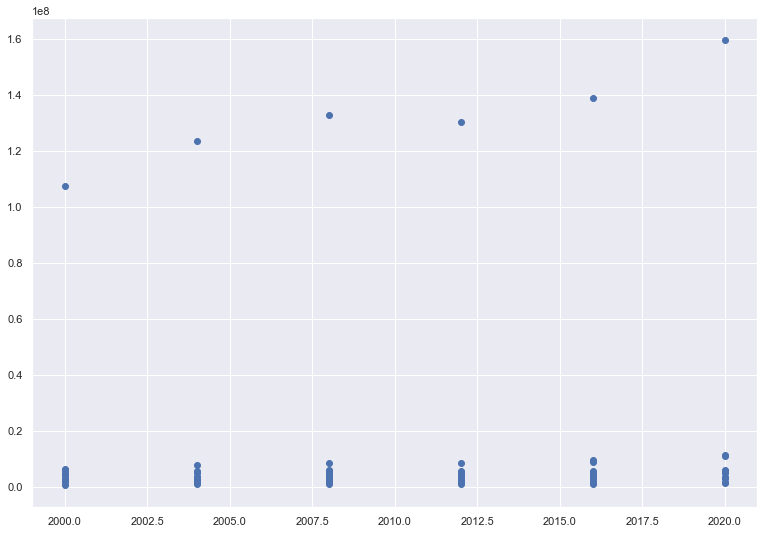

In [358]:
#Has US total
fig, ax = plt.subplots(figsize=(13, 9))
ax.scatter(df4.Year, df4['Votes_Cast'])

In [359]:
df4_withoutus = df4[df4.State!='United States']
df4_withoutus.head()

,State,Votes_Cast,Year
55,Arizona,2323579.0,2012
62,Florida,8538264.0,2012
63,Georgia,3919355.0,2012
68,Iowa,1589951.0,2012
75,Michigan,4780701.0,2012


[(1999.0, 2021.0)]

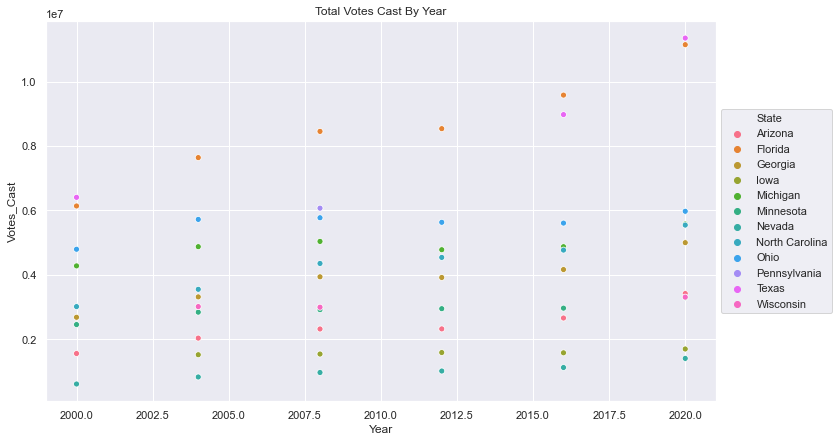

In [361]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(12,7))
g = sns.scatterplot(data = df4_withoutus, x = "Year", y = 'Votes_Cast', hue = 'State')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_title("Total Votes Cast By Year")
g.set(xlim = (1999,2021))





Text(0.5, 1.0, 'Total Votes Cast')

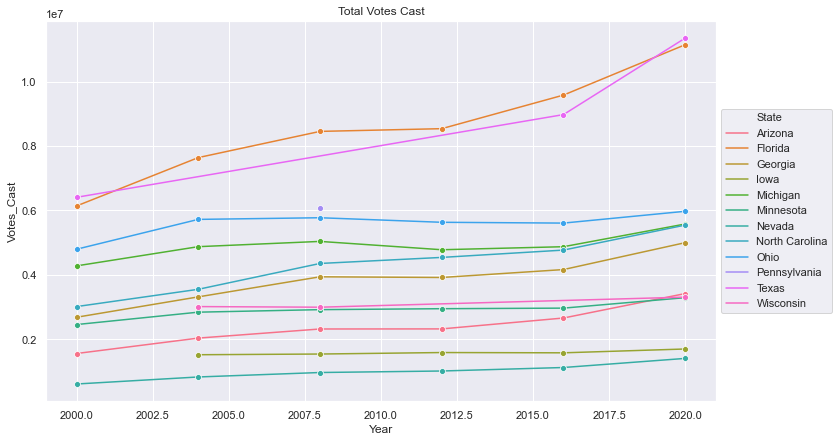

In [362]:
fig, ax = pyplot.subplots(figsize=(12,7))
g = sns.lineplot(data = df4_withoutus, x = "Year", y = 'Votes_Cast', hue = 'State', marker="o")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set_title("Total Votes Cast")

In [363]:
early2016 = pd.read_csv('data_absentee_voting/2016_early.csv',header = 2)
early2016.head()

,State,CD,Source,Total Cand Vote w/o Write-In,"Total ""Advance"" ballots Cast (mail and in-person)",Mail Ballots Sent or Requested,Mail Ballots Returned,Early/In Person Cast,Total Advance,As of,% of 2012 Advance,Dem,%,Rep,%.1,Other,%.2,Ind,%.3,Party total,White,%.4,Black,%.5,Hispanic,%.6,Other.1,%.7,Unknown,%.8,Race Total,Female,%.9,Male,%.10,Unknown.1,%.11,Gender Total,18-29,%.12,30-44,%.13,45-60,%.14,60+,%.15,Unknown.2,%.16,Age Total,Note
0,AL,NaN,AP,"2,070,327","86,146","5,846","2,399",NaN,"2,399",10/12,2.8%,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,NaN
1,AK,NaN,AP,"297,625","79,885","70,224","51,803",NaN,"51,803",11/4,64.8%,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,NaN
2,AZ,NaN,https://twitter.com/Garrett_Archer/status/7956...,"2,298,802","1,515,164",NaN,"1,661,874",NaN,"1,661,874",11/7,109.7%,"554,910",33.6%,"659,600",40.0%,"25,845",1.6%,"409,272",24.8%,"1,649,627",NaN,,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,party breakdown does not reflect updated total
3,AR,NaN,https://twitter.com/ARSecofState/status/795662...,"1,069,468","497,962",NaN,"25,199","565,468","590,667",11/7,118.6%,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,NaN
4,CA,NaN,https://public.tableau.com/profile/paulmitche1...,"13,015,298","6,753,688","11,708,213","5,294,036",NaN,"5,294,036",11/8,78.4%,"2,430,715",45.9%,"1,658,835",31.3%,NaN,,"1,204,486",22.8%,"5,294,036",NaN,,NaN,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,,NaN,,NaN,,NaN,,NaN,,NaN,,,Ind includes minor parties


In [364]:
early2016 = early2016[['State','Mail Ballots Sent or Requested','Mail Ballots Returned']]
early2016

,State,Mail Ballots Sent or Requested,Mail Ballots Returned
0,AL,"5,846","2,399"
1,AK,"70,224","51,803"
2,AZ,NaN,"1,661,874"
3,AR,NaN,"25,199"
4,CA,"11,708,213","5,294,036"
5,CO,NaN,"2,215,258"
6,CT,NaN,NaN
7,DE,"26,647","22,387"
8,DC,NaN,NaN
9,FL,"6,980,238","2,636,783"


In [365]:
#Getting just our states
early2016 = early2016[early2016.State.isin(['AZ','FL','GA','OH','NC', 'NV','MN','MI','IA','WI','PA','TX'])]
early2016


,State,Mail Ballots Sent or Requested,Mail Ballots Returned
2,AZ,NaN,"1,661,874"
9,FL,"6,980,238","2,636,783"
10,GA,"2,443,600","181,315"
15,IA,"660,711","630,540"
24,MI,"1,300,277","1,116,233"
25,MN,"672,407","568,196"
30,NV,NaN,"67,735"
35,NC,"3,164,033","155,374"
37,OH,"1,972,025","1,122,894"
40,PA,NaN,NaN


In [366]:
early2016.dtypes

State                             object
Mail Ballots Sent or Requested    object
Mail Ballots Returned             object
dtype: object

In [367]:
early2016['Mail Ballots Sent or Requested'] = early2016['Mail Ballots Sent or Requested'].str.replace(',','')
early2016['Mail Ballots Returned'] = early2016['Mail Ballots Returned'].str.replace(',','')
early2016.head()


<ipython-input-367-0b8cbec368b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early2016['Mail Ballots Sent or Requested'] = early2016['Mail Ballots Sent or Requested'].str.replace(',','')
<ipython-input-367-0b8cbec368b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early2016['Mail Ballots Returned'] = early2016['Mail Ballots Returned'].str.replace(',','')


,State,Mail Ballots Sent or Requested,Mail Ballots Returned
2,AZ,NaN,1661874
9,FL,6980238,2636783
10,GA,2443600,181315
15,IA,660711,630540
24,MI,1300277,1116233


In [368]:
early2016['Mail Ballots Sent or Requested'] = pd.to_numeric(early2016['Mail Ballots Sent or Requested'])
early2016['Mail Ballots Returned'] = pd.to_numeric(early2016['Mail Ballots Returned'])
early2016.dtypes

<ipython-input-368-681da672c561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early2016['Mail Ballots Sent or Requested'] = pd.to_numeric(early2016['Mail Ballots Sent or Requested'])
<ipython-input-368-681da672c561>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early2016['Mail Ballots Returned'] = pd.to_numeric(early2016['Mail Ballots Returned'])


State                              object
Mail Ballots Sent or Requested    float64
Mail Ballots Returned             float64
dtype: object

Text(0.5, 1.0, 'Mail in Ballots Sent/Requested by State 2016')

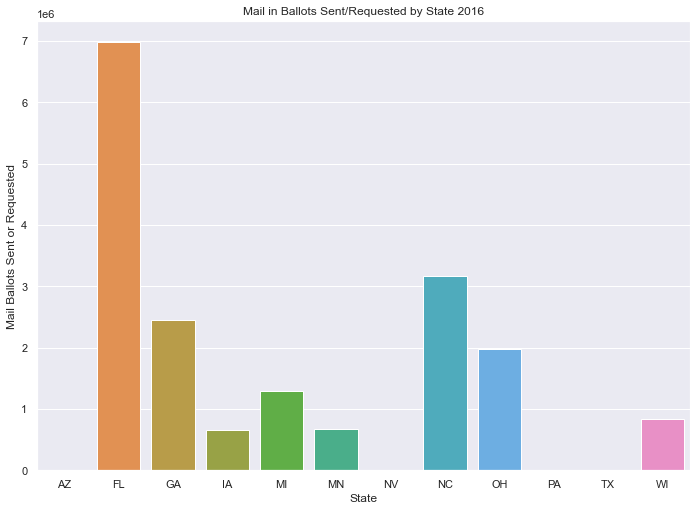

In [374]:
fig, ax = plt.subplots()
ax1 = sns.barplot(x="State", y="Mail Ballots Sent or Requested", data=early2016)
ax1.set_title("Mail in Ballots Sent/Requested by State 2016")

Text(0.5, 1.0, 'Mail in Ballots Returned by State 2016')

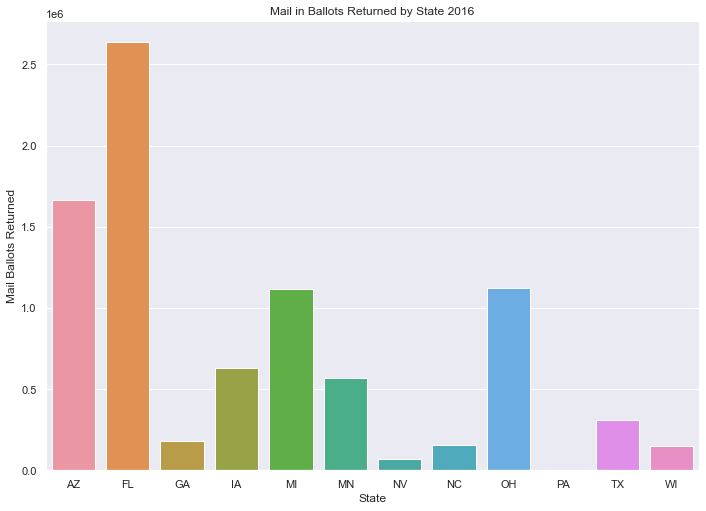

In [375]:
fig, ax = plt.subplots()
ax1 = sns.barplot(x="State", y="Mail Ballots Returned", data=early2016)
ax1.set_title("Mail in Ballots Returned by State 2016")

In [376]:
early2020 = pd.read_csv('data_absentee_voting/turnout_2020.csv')
early2020.head()

,State,Ballots_Requested,Ballots_Returned,Democrat_Requested,Repub_Requested,Dem_Returned,Repub_returned
0,AZ,3448181.0,2471577.0,1206522.0,1238488.0,923805.0,914172.0
1,FL,6011508.0,4737540.0,2687604.0,1875245.0,2146654.0,1472826.0
2,GA,1782580.0,1320154.0,NaN,NaN,NaN,NaN
3,IA,1030359.0,996981.0,462222.0,341866.0,449290.0,331802.0
4,MI,3318609.0,2841696.0,NaN,NaN,NaN,NaN


In [377]:
early2016.head()

,State,Mail Ballots Sent or Requested,Mail Ballots Returned
2,AZ,NaN,1661874.0
9,FL,6980238.0,2636783.0
10,GA,2443600.0,181315.0
15,IA,660711.0,630540.0
24,MI,1300277.0,1116233.0


In [379]:
#combining so i can plot 2016 and 2020 on same graph
returned2020 = early2020[['State', 'Ballots_Returned']]
returned2020['Year'] = 2020
combined = early2016[['State','Mail Ballots Returned']]
combined.columns = ['State','Ballots_Returned']
combined['Year'] = 2016
df6 = [returned2020,combined]
df6 = pd.concat(df6)
df6.head()

<ipython-input-379-1ef53ed048d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returned2020['Year'] = 2020


,State,Ballots_Returned,Year
0,AZ,2471577.0,2020
1,FL,4737540.0,2020
2,GA,1320154.0,2020
3,IA,996981.0,2020
4,MI,2841696.0,2020


In [380]:
df6.tail()

,State,Ballots_Returned,Year
35,NC,155374.0,2016
37,OH,1122894.0,2016
40,PA,NaN,2016
45,TX,311324.0,2016
51,WI,146932.0,2016


Text(0.5, 0.98, 'Mail In Ballots Returned By Year')

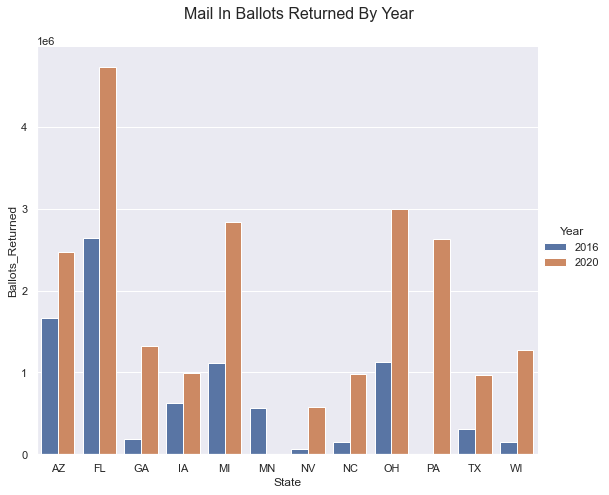

In [382]:
g2 = sns.catplot(x="State", y="Ballots_Returned",hue="Year", data=df6, kind="bar", height = 7, aspect = 1.1);


g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('Mail In Ballots Returned By Year', fontsize=16)


Text(0.5, 1.0, 'Mail in Ballots Returned by Democrats 2020')

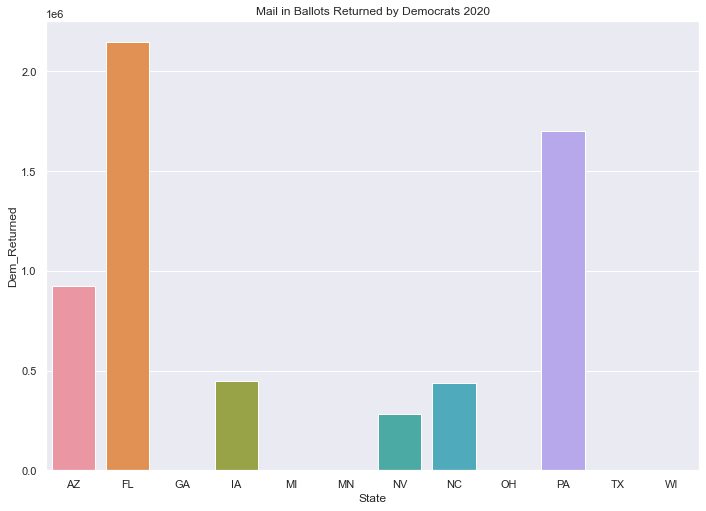

In [383]:

ax1 = sns.barplot(x="State", y="Dem_Returned", data=early2020)
ax1.set_title("Mail in Ballots Returned by Democrats 2020")

In [384]:
early2020

,State,Ballots_Requested,Ballots_Returned,Democrat_Requested,Repub_Requested,Dem_Returned,Repub_returned
0,AZ,3448181.0,2471577.0,1206522.0,1238488.0,923805.0,914172.0
1,FL,6011508.0,4737540.0,2687604.0,1875245.0,2146654.0,1472826.0
2,GA,1782580.0,1320154.0,NaN,NaN,NaN,NaN
3,IA,1030359.0,996981.0,462222.0,341866.0,449290.0,331802.0
4,MI,3318609.0,2841696.0,NaN,NaN,NaN,NaN
5,MN,2055519.0,NaN,NaN,NaN,NaN,NaN
6,NV,1768994.0,579553.0,667100.0,568785.0,279847.0,149868.0
7,NC,1456014.0,977186.0,669285.0,288383.0,438250.0,201169.0
8,OH,3211203.0,3000827.0,NaN,NaN,NaN,NaN
9,PA,3087524.0,2629672.0,1941131.0,784851.0,1702484.0,623404.0


In [385]:
df7 = pd.read_csv('data_absentee_voting/turnout_2020_party.csv')
df7.head()

,State,Party,Num_returned
0,AZ,D,923805
1,FL,D,2146654
2,IA,D,449290
3,NV,D,279847
4,NC,D,438250


Text(0.5, 1.0, 'Mail in Ballots Returned by Party 2020')

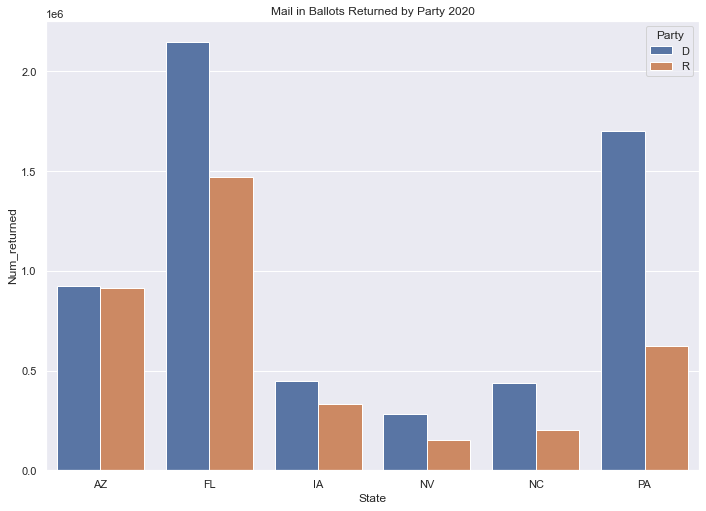

In [386]:
ax1 = sns.barplot(x="State", y="Num_returned", hue = 'Party',data=df7)
ax1.set_title("Mail in Ballots Returned by Party 2020")